# Connect to google drive

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Get necessaries library

In [69]:
!pip install contractions
!pip install wordcloud
import contractions
import pickle as pk
import string
import pandas as pd
import re
from bs4 import BeautifulSoup
import spacy
import unicodedata
nlp = spacy.load('en_core_web_sm')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle as pk



# download second movie dataset

In [70]:
df = pd.read_csv('/content/drive/MyDrive/nlp/Test/yelp_labelled_v1.csv')

In [71]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Review      992 non-null    object 
 1   sentiment   991 non-null    object 
 2   Unnamed: 2  289 non-null    object 
 3   Unnamed: 3  63 non-null     object 
 4   Unnamed: 4  12 non-null     object 
 5   Unnamed: 5  1 non-null      float64
dtypes: float64(1), object(5)
memory usage: 46.6+ KB


# remove null columns

In [72]:
df = df.drop('Unnamed: 2', axis=1)
df = df.drop('Unnamed: 3', axis=1)
df = df.drop('Unnamed: 4', axis=1)
df = df.drop('Unnamed: 5', axis=1)



In [73]:
df.shape

df.info()

print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     992 non-null    object
 1   sentiment  991 non-null    object
dtypes: object(2)
memory usage: 15.6+ KB
                                                Review  \
0                             Wow... Loved this place.   
1                                   Crust is not good.   
2            Not tasty and the texture was just nasty.   
3    Stopped by during the late May bank holiday of...   
4    The selection on the menu was great and so wer...   
..                                                 ...   
987  I think food should have flavor and texture an...   
988                           Appetite instantly gone.   
989  Overall I was not impressed and would not go b...   
990             The whole experience was underwhelming   
991                                               Then   

  

# Delete rows in sentiment columns with string values and reset indexes

In [74]:
df_back = df.copy()
df["sentimen_edit"] = pd.to_numeric(df["sentiment"], errors="coerce")
df.dropna(subset=["sentimen_edit"], inplace=True)
df.reset_index(drop=True, inplace=True)

In [75]:
print(df)

                                                Review sentiment  \
0                             Wow... Loved this place.         1   
1                                   Crust is not good.         0   
2            Not tasty and the texture was just nasty.         0   
3    Stopped by during the late May bank holiday of...         1   
4    The selection on the menu was great and so wer...         1   
..                                                 ...       ...   
698            the presentation of the food was awful.         0   
699           I can't tell you how disappointed I was.         0   
700  I think food should have flavor and texture an...         0   
701                           Appetite instantly gone.         0   
702  Overall I was not impressed and would not go b...         0   

     sentimen_edit  
0              1.0  
1              0.0  
2              0.0  
3              1.0  
4              1.0  
..             ...  
698            0.0  
699            

# remove duplicates

In [76]:
# Check if there are aduplicated values in the data & drop it if found :
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)
df = df.drop_duplicates()
duplicated_features=df.duplicated().sum()
print("Number of duplicates of cleaning it ----->>> ",duplicated_features)

Number of duplicates ----->>>  5
Number of duplicates of cleaning it ----->>>  0


In [77]:
df.reset_index(drop=True, inplace=True)

In [78]:
df_backup = df.copy()
df = df.drop('sentiment', axis=1)

# pre-processing only on reviews column

In [79]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df.Review = df['Review'].apply(remove_emoji)

def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()
df.Review = df['Review'].apply(remove_html_tags)


def to_lowercase(text):
    return text.lower()
df.Review = df['Review'].apply(to_lowercase)


def standardize_accented_chars(text):
 return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
df.Review = df['Review'].apply(standardize_accented_chars)


def expand_contractions(text):
    expanded_words = []
    for word in text.split():
       expanded_words.append(contractions.fix(word))
    return ' '.join(expanded_words)
df.Review = df['Review'].apply(expand_contractions)


def remove_url(text):
 return re.sub(r'https?:\S*', '', text)
df.Review = df['Review'].apply(remove_url)



def remove_mentions_and_tags(text):
    text = re.sub(r'@\S*', '', text)
    return re.sub(r'#\S*', '', text)

df.Review = df['Review'].apply(remove_mentions_and_tags)



def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]'
    return re.sub(pat, '', text)
df.Review = df['Review'].apply(remove_special_characters)


def remove_numbers(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]'
    return re.sub(pattern, '', text)
df.Review = df['Review'].apply(remove_numbers)


def remove_punctuation(text):
    return ''.join([c for c in text if c not in string.punctuation])
df.Review = df['Review'].apply(remove_punctuation)


def data_processing(text):
  return re.sub('', '', text)
df.Review = df['Review'].apply(data_processing)

df.Review = df.Review.replace(r'\s+', ' ', regex=True)



<ipython-input-79-fbb95c6d08c5>:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


In [80]:
print(df)

                                                Review  sentimen_edit
0                                 wow loved this place            1.0
1                                    crust is not good            0.0
2             not tasty and the texture was just nasty            0.0
3    stopped by during the late may bank holiday of...            1.0
4    the selection on the menu was great and so wer...            1.0
..                                                 ...            ...
693             the presentation of the food was awful            0.0
694           i cannot tell you how disappointed i was            0.0
695  i think food should have flavor and texture an...            0.0
696                            appetite instantly gone            0.0
697  overall i was not impressed and would not go back            0.0

[698 rows x 2 columns]


# removing stopwords

In [81]:
def remove_stopwords(text):
    filtered_sentence =[]
    doc=nlp(text)
    for token in doc:
        if token.is_stop == False:
          filtered_sentence.append(token.text)
    return ' ' .join(filtered_sentence)
df.Review = df['Review'].apply(remove_stopwords)



# lemmtization

In [82]:
def lemmatize(text):
   doc = nlp(text)
   lemmatized_text = []
   for token in doc:
     lemmatized_text.append(token.lemma_)
   return ' '.join(lemmatized_text)
df['Review'] = df.Review.apply(lemmatize)

In [83]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Review         698 non-null    object 
 1   sentimen_edit  698 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.0+ KB
None


In [84]:
df['Review'].astype(str)

,Review
0,wow love place
1,crust good
2,tasty texture nasty
3,stop late bank holiday rick steve recommendati...
4,selection menu great price
...,...
693,presentation food awful
694,tell disappointed
695,think food flavor texture lack
696,appetite instantly go


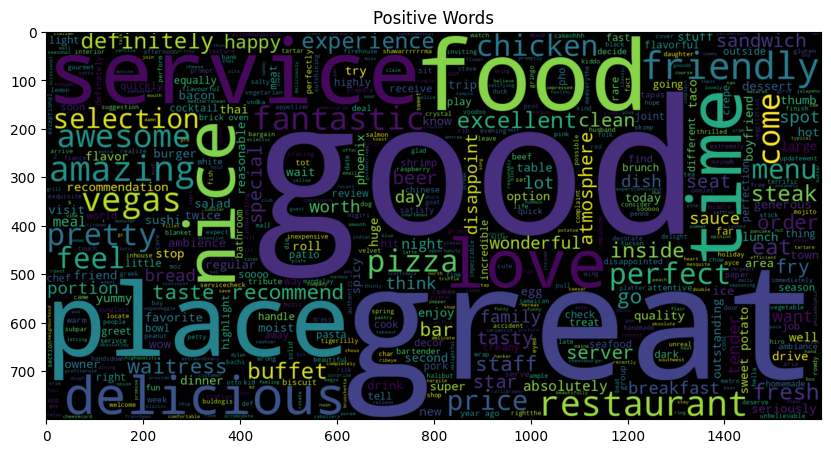

In [85]:
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentimen_edit == 1.0].Review))
plt.title("Positive Words")
plt.imshow(wc , interpolation = 'bilinear')

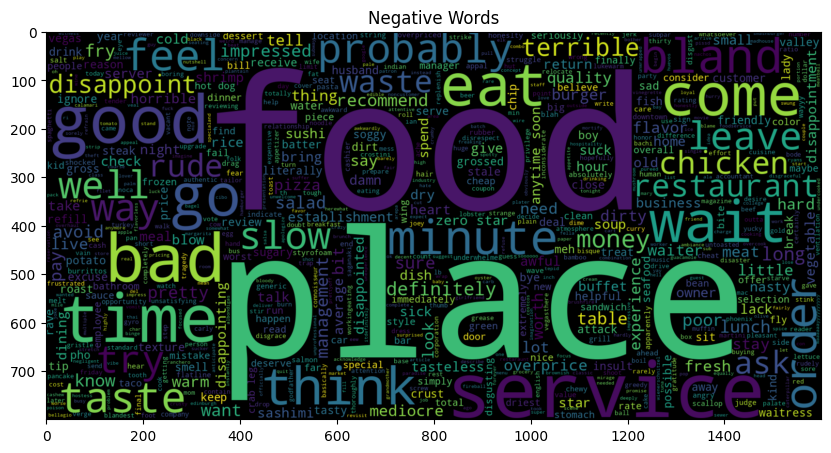

In [87]:
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentimen_edit == 0.0].Review))
plt.title("Negative Words")
plt.imshow(wc , interpolation = 'bilinear')

# Download previous train model


In [88]:
model = pk.load(open('/content/drive/MyDrive/nlp/Test_v1/model.pkl','rb'))
scaler = pk.load(open('/content/drive/MyDrive/nlp/Test_v1/scaler.pkl','rb'))

In [89]:
print(df)

                                                Review  sentimen_edit
0                                       wow love place            1.0
1                                           crust good            0.0
2                                  tasty texture nasty            0.0
3    stop late bank holiday rick steve recommendati...            1.0
4                           selection menu great price            1.0
..                                                 ...            ...
693                            presentation food awful            0.0
694                                  tell disappointed            0.0
695                     think food flavor texture lack            0.0
696                              appetite instantly go            0.0
697                                  overall impressed            0.0

[698 rows x 2 columns]


In [90]:
number_column = df.shape[1]

In [91]:
col_one_list = df['Review'].tolist()

In [92]:
list_score = []

In [93]:
for i in col_one_list:
  review = i
  review_scale = scaler.transform([review]).toarray()
  result = model.predict(review_scale)
  if result[0] == 0:
    list_score.append (0)
  else:
    list_score.append(1)

In [94]:
series_score = pd.Series( list_score)

In [95]:
print(series_score)

0      1
1      0
2      0
3      1
4      1
      ..
693    0
694    0
695    0
696    0
697    0
Length: 698, dtype: int64


In [96]:
df['score_validate'] = series_score

In [97]:
df.sentimen_edit = df.sentimen_edit.astype(float)
df.score_validate = df.score_validate.astype(float)

In [98]:
df['sentimen_edit'].equals(df['score_validate'])

False

In [100]:
number_rows = df.shape[0]
k = 0
m= 0
for i in range(number_rows):
  if df.sentimen_edit[i] == df.score_validate[i]:
    k = k + 1
  else:
    m = m + 1


# m is incorrect prediction by model

# k is correct prediction by model

In [103]:
final_answer = (k)/(k+m)

# calculate final answer

In [102]:
print("percent correct guess = " ,final_answer)

percent correct guess =  0.9312320916905444
